In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv('data/train.csv')

In [4]:
data.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
34546,34546,0.59,Ideal,G,VVS2,62.0,55.0,5.36,5.42,3.34,2401
54801,54801,0.37,Very Good,E,SI2,60.7,58.0,4.70,4.73,2.86,647
13164,13164,1.59,Premium,D,SI2,62.5,61.0,7.61,7.48,4.71,10748
25223,25223,0.43,Ideal,D,SI1,61.6,56.0,4.85,4.87,2.99,792
114345,114345,1.07,Ideal,G,SI2,61.5,59.0,6.58,6.62,4.06,4201


In [5]:
data.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
data.shape

(193573, 11)

In [7]:
data.size

2129303

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [12]:
data = data.drop(labels=['id'],axis=1)

In [13]:
categorical_columns = data.columns[data.dtypes=='object']

In [14]:
numerical_columns = data.columns[data.dtypes!='object']

In [15]:
data[categorical_columns]['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [16]:
data[categorical_columns]['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [17]:
data[categorical_columns]['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

(array([49910.,     0., 37566.,     0.,     0., 92454.,     0., 11622.,
            0.,  2021.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

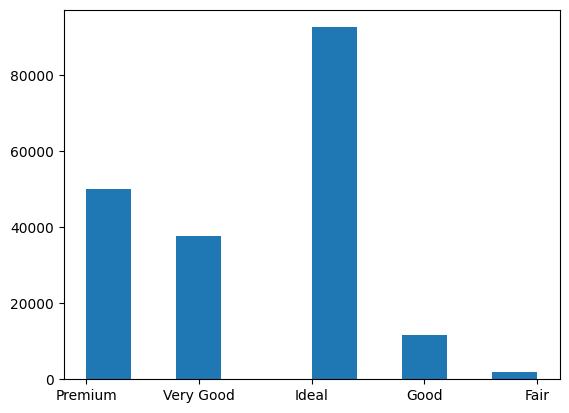

In [18]:
plt.figure('10,8')
plt.hist(data[categorical_columns]['cut'])

(array([48027., 30484., 30669.,     0., 53272.,  4219.,     0., 15762.,
        10628.,   512.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

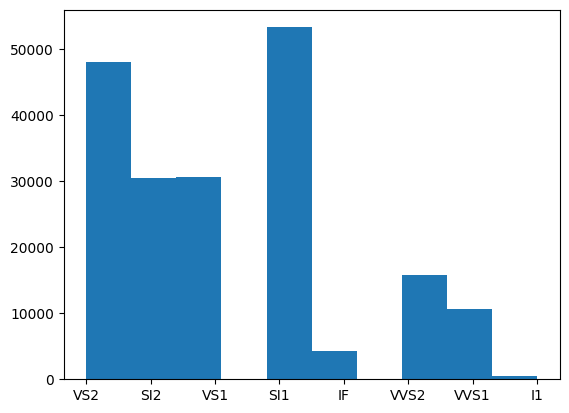

In [19]:
plt.hist(data[categorical_columns]['clarity'])

<Axes: xlabel='cut', ylabel='Count'>

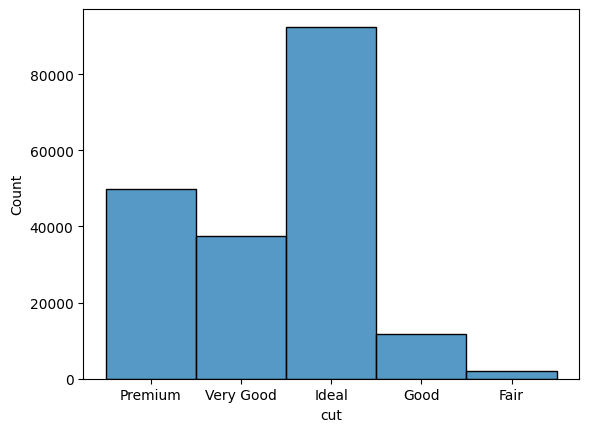

In [20]:
sns.histplot(data[categorical_columns]['cut'])

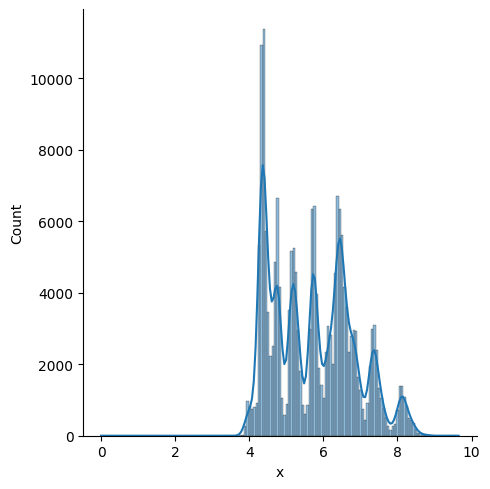

In [21]:
sns.displot(data[numerical_columns]['x'],kde=True)

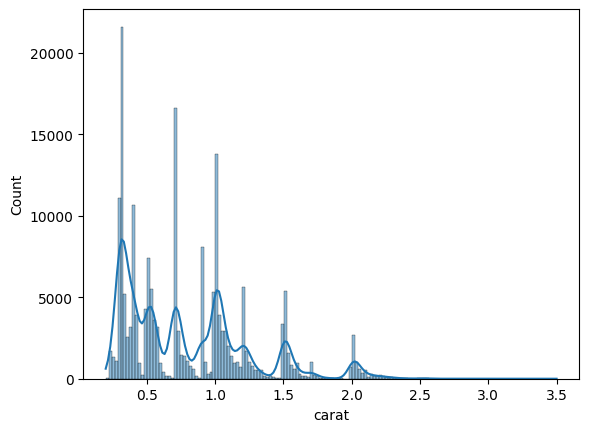

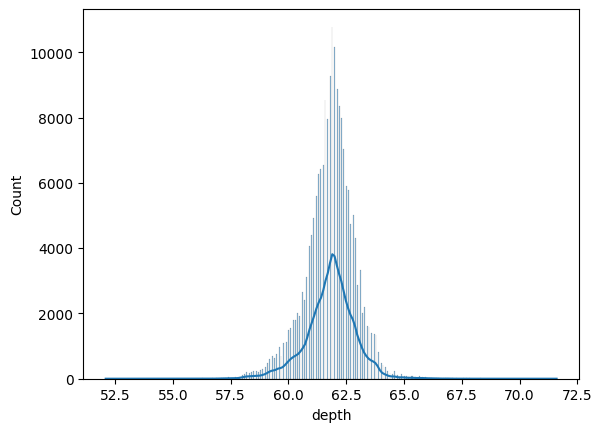

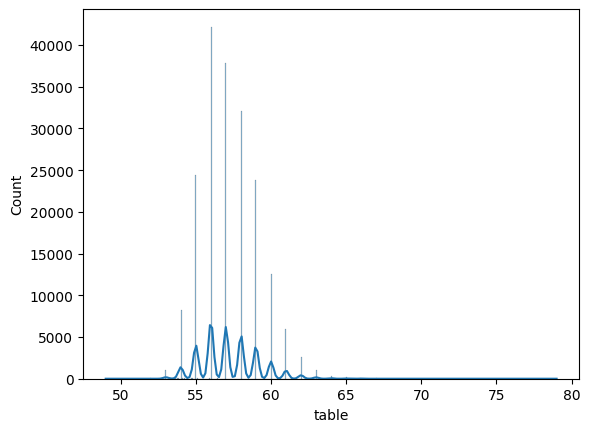

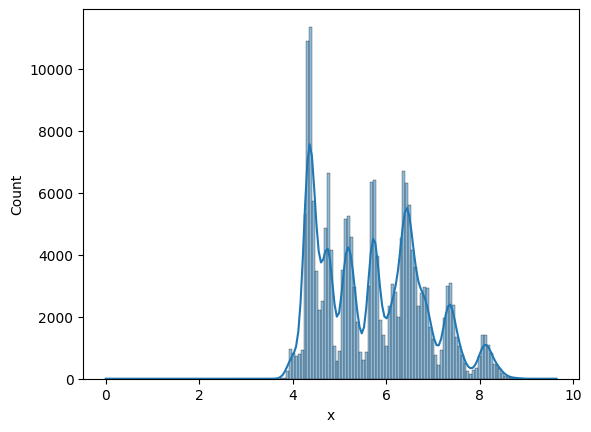

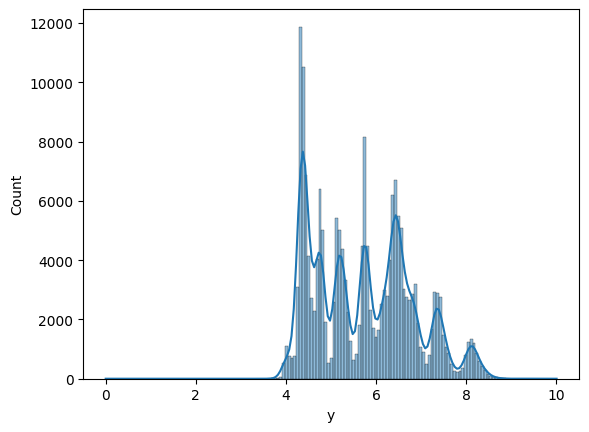

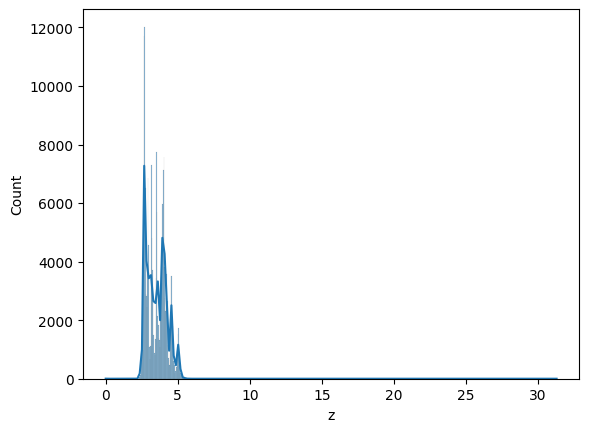

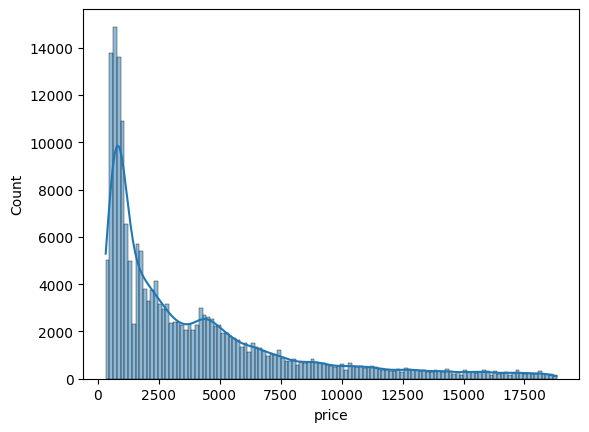

In [22]:
for column in numerical_columns:
    sns.histplot(data=data,x=column,kde=True)
    print('\n')
    plt.show()

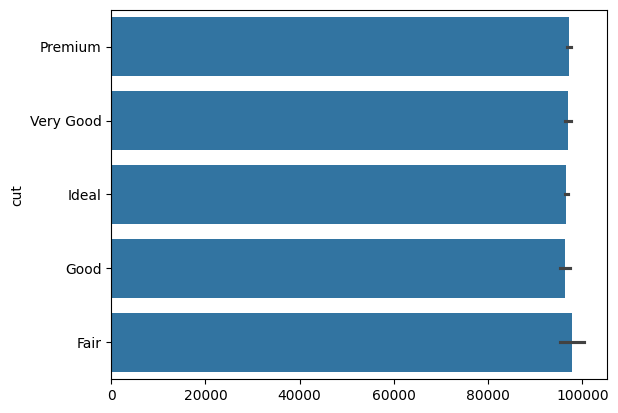

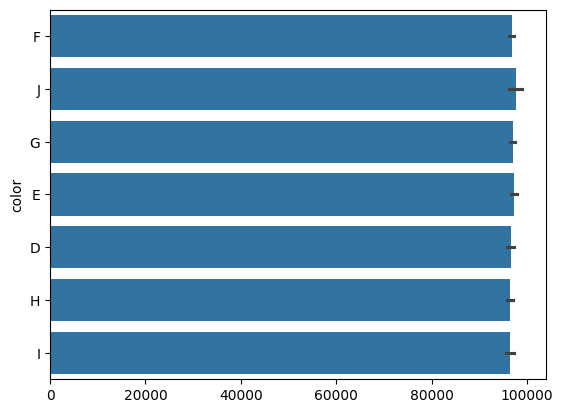

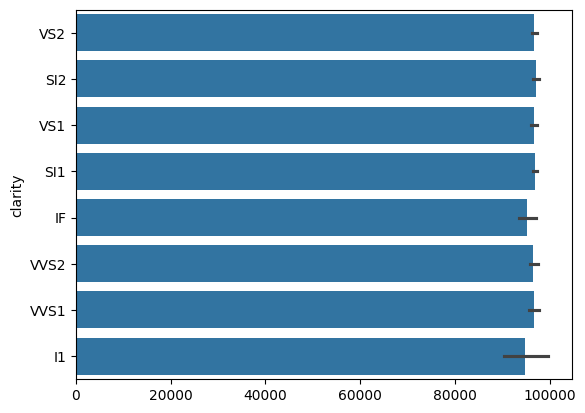

In [23]:
for column in categorical_columns:
    sns.barplot(data[column])
    print('\n')
    plt.show()

<Axes: >

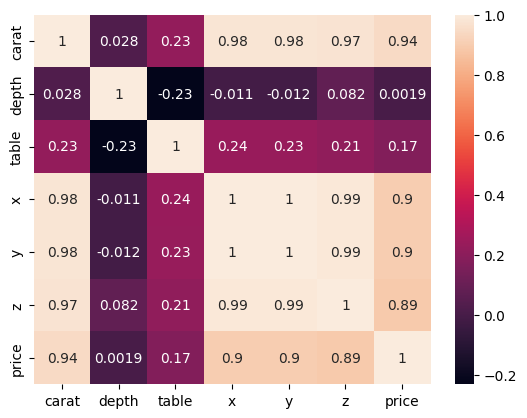

In [24]:
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [25]:
cut_map = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
color_map = {'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}
clarity_map = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [28]:
data['cut']=data['cut'].map(cut_map)
data['color']=data['color'].map(color_map)
data['clarity']=data['clarity'].map(clarity_map)

In [29]:
data['cut']

0         4
1         3
2         5
3         5
4         4
         ..
193568    5
193569    4
193570    3
193571    3
193572    2
Name: cut, Length: 193573, dtype: int64

In [30]:
data['clarity']

0         4
1         2
2         5
3         5
4         4
         ..
193568    6
193569    6
193570    3
193571    3
193572    2
Name: clarity, Length: 193573, dtype: int64

In [31]:
data['color']

0         3
1         7
2         4
3         4
4         4
         ..
193568    1
193569    4
193570    3
193571    1
193572    2
Name: color, Length: 193573, dtype: int64